# GoogleStock Prediction Using RNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("GoogleStockPrice_Train.csv")
test_df = pd.read_csv("GoogleStockPrice_Test.csv")

In [4]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,533.709833,151.904442,279.12,404.115,537.47,654.9225,816.68
High,1258.0,537.880223,153.008811,281.21,406.765,540.75,662.5875,816.68
Low,1258.0,529.007409,150.552807,277.22,401.765,532.99,644.8000,805.14


In [6]:
train_df.shape

(1258, 6)

### Check for Null and Duplicate Values

In [7]:
train_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Data Visualization

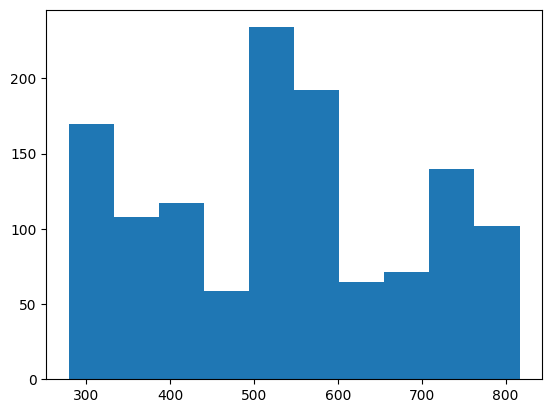

In [8]:
plt.hist(train_df["Open"])
plt.show()

[]

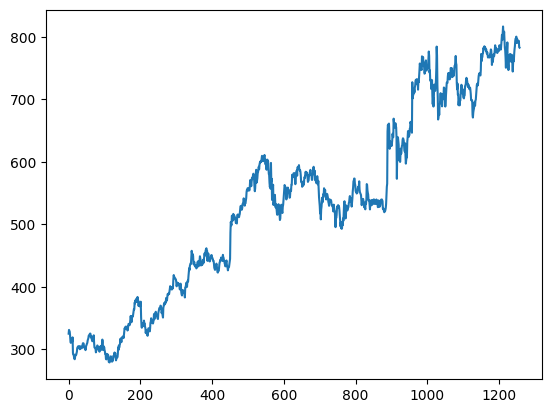

In [9]:
plt.plot(train_df["Open"])
plt.plot()

### Selecting Opening Price for Time Series

In [10]:
train_df = train_df.loc[:,["Open"]].values
train_df

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Standardizing the Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = MinMaxScaler()
train_df = sc.fit_transform(train_df)

In [13]:
train_df

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [14]:
X_train = train_df[0:1257]
y_train = train_df[1:1258]

X_train=np.reshape(X_train, (1257 , 1 , 1))

In [15]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [16]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM

In [17]:
regressor = Sequential()
regressor.add(LSTM(units=260, activation="sigmoid", return_sequences=True, input_shape=(None, 1)))
regressor.add(LSTM(units=130, activation="sigmoid", return_sequences=True, input_shape=(None, 1)))
regressor.add(LSTM(units=60, activation="sigmoid", return_sequences=True, input_shape=(None, 1)))
regressor.add(Dense(units=1))

In [18]:
regressor.compile(optimizer="adam", loss='mean_squared_error')

In [19]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
40/40 [==============================] - 12s 25ms/step - loss: 0.1626
Epoch 2/100
40/40 [==============================] - 1s 28ms/step - loss: 0.0810
Epoch 3/100
40/40 [==============================] - 1s 32ms/step - loss: 0.0795
Epoch 4/100
40/40 [==============================] - 1s 25ms/step - loss: 0.0794
Epoch 5/100
40/40 [==============================] - 1s 28ms/step - loss: 0.0781
Epoch 6/100
40/40 [==============================] - 1s 26ms/step - loss: 0.0775
Epoch 7/100
40/40 [==============================] - 1s 32ms/step - loss: 0.0759
Epoch 8/100
40/40 [==============================] - 1s 35ms/step - loss: 0.0712
Epoch 9/100
40/40 [==============================] - 2s 39ms/step - loss: 0.0662
Epoch 10/100
40/40 [==============================] - 1s 31ms/step - loss: 0.0573
Epoch 11/100
40/40 [==============================] - 1s 29ms/step - loss: 0.0414
Epoch 12/100
40/40 [==============================] - 1s 32ms/step - loss: 0.0192
Epoch 13/100
40/40 [====

### Import Test Data

In [20]:
test_set = pd.read_csv('GoogleStockPrice_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values


In [21]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Scale Down the test data

In [22]:
inputs = real_stock_price
inputs = sc.transform(inputs)

In [23]:
inputs

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [24]:
inputs = np.reshape(inputs, (20, 1, 1))

In [25]:
predicted_stock_price = regressor.predict(inputs)

1/1 [==============================] - 1s 1s/step


In [26]:
predicted_stock_price

array([[[0.9308946 ]],

       [[0.9470154 ]],

       [[0.94318026]],

       [[0.9585706 ]],

       [[0.9770588 ]],

       [[0.9794662 ]],

       [[0.9747467 ]],

       [[0.9782795 ]],

       [[0.9788401 ]],

       [[0.9781806 ]],

       [[0.9760847 ]],

       [[0.9749452 ]],

       [[0.9779001 ]],

       [[0.9784609 ]],

       [[1.0030794 ]],

       [[1.01491   ]],

       [[1.0280336 ]],

       [[1.0230803 ]],

       [[0.99063104]],

       [[0.9612388 ]]], dtype=float32)

In [27]:
pred_price = np.reshape(predicted_stock_price, (20, 1))

In [28]:
pred_price = sc.inverse_transform(pred_price)

In [29]:
pred_price

array([[779.5317 ],
       [788.1976 ],
       [786.136  ],
       [794.4092 ],
       [804.3478 ],
       [805.64185],
       [803.1048 ],
       [805.0039 ],
       [805.30524],
       [804.95074],
       [803.8241 ],
       [803.2115 ],
       [804.8    ],
       [805.10144],
       [818.3353 ],
       [824.695  ],
       [831.7497 ],
       [829.08704],
       [811.6436 ],
       [795.84357]], dtype=float32)

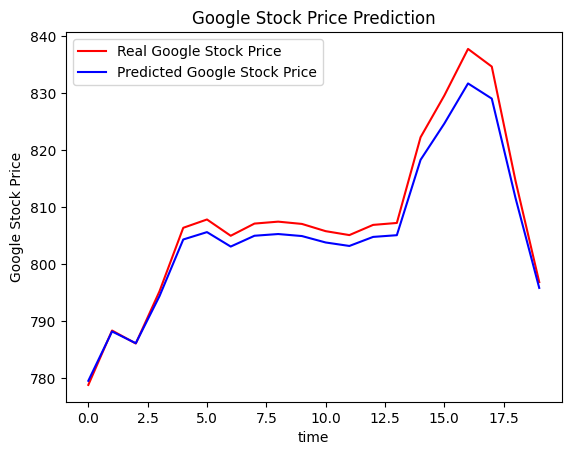

In [30]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot(pred_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()